### Power Method is a numerical method for estimating the dominant eigenvalue and a corresponding eigenvector for a matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def power_method(matA: np.ndarray, vecX: np.ndarray, epsilon: float = 1e-6, n_iter_max: int = 100000):
    
    """
    Power method for finding dominant eigenvalue and eigenvector of a matrix.

    Args:
        matA (np.ndarray): Input matrix.
        vecX (np.ndarray): Initial eigenvector guess.
        epsilon (float): Absolute Tolerance. Default is 1e-6.
        n_iter_max (int): Maximum number of iterations. Default is 100000.

    Returns:
        eigen_arr (list): List of eigenvalues at each iteration.
        i (int): Number of steps taken to converge.

    """

    eigen_arr = []  # List to store eigenvalues
    
    print(f"Initial eigenvector = {vecX}")

    for i in range(n_iter_max):
        x = np.dot(matA, vecX)      # Perform matrix-vector multiplication
        eig_val = abs(x).max()      # Compute maximum eigenvalue
        x = x / eig_val             # Normalize eigenvector
        eigen_arr.append(eig_val)   # Store eigenvalue

        norm = np.linalg.norm(vecX - x)  # Compute the norm of the difference between current and previous eigenvector
        if norm < epsilon:               # Check convergence
            break

        vecX = x                     # Update eigenvector for next iteration

    print(f'Eigenvalue = {eig_val}')     # Print the dominant eigenvalue
    print(f'Eigenvector = {vecX / np.linalg.norm(vecX)}')  # Print the normalized dominant eigenvector
    print(f'No. of steps to converge = {i+1}')  # Print the number of steps taken to converge

    return eigen_arr, i+1

### Testing with Matrix $A=\begin{bmatrix}
2 & 1 & 2 \\
1 & 3 & 2 \\
2 & 4 & 1 
\end{bmatrix} $ 

In [3]:
matA = np.array([[2, 1, 2],
              [1, 3, 2],
              [2, 4, 1]])

#### 1. With intial guess eigenvector: `[-1, 0.5, 3]`

In [4]:
vecX1 = np.array([-1, 0.5, 3])

eigen_arr1, num_steps1 = power_method(matA,vecX1)

Initial eigenvector = [-1.   0.5  3. ]
Eigenvalue = 6.029113170908028
Eigenvector = [0.47185755 0.58896962 0.6560985 ]
No. of steps to converge = 12


#### 2. With initial guess eigenvector: `[2, -6, 0.2]`

In [5]:
vecX2 = np.array([2, -6, 0.2])

eigen_arr2, num_steps2 = power_method(matA,vecX2)

Initial eigenvector = [ 2.  -6.   0.2]
Eigenvalue = 6.029114969441547
Eigenvector = [-0.47185731 -0.58896992 -0.6560984 ]
No. of steps to converge = 11


#### 3. Comparing the results with output of numpy API `numpy.linalg.eig` function

In [6]:
E,V = np.linalg.eig(matA)
print('Values generated by the numpy API numpy.linalg.eig')
print('Eigenvalue: ', E[0])
print('Eigenvector: ', V[:,0])

Values generated by the numpy API numpy.linalg.eig
Eigenvalue:  6.029111920025985
Eigenvector:  [-0.47185751 -0.58896955 -0.65609859]


#### 4. Plotting the results

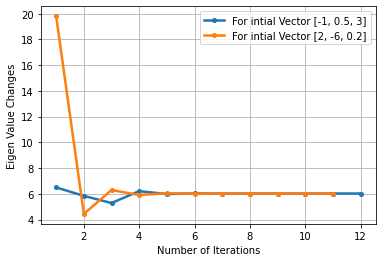

In [7]:
plt.plot(range(1,num_steps1+1),eigen_arr1, marker='o',label = "For intial Vector [-1, 0.5, 3]",linewidth=2.5,markersize=4)
plt.plot(range(1,num_steps2+1),eigen_arr2, marker='o' ,label = "For intial Vector [2, -6, 0.2]",linewidth=2.5,markersize=4)
plt.grid()

plt.xlabel("Number of Iterations")
plt.ylabel("Eigen Value Changes")
plt.rcParams['figure.figsize'] = [10, 7]
plt.legend()